In [15]:
# initial imports

import torch

import matplotlib.pyplot as plt

## 1. Different types of tensors using pytorch

1. empty tensor - uninitialized.  the tensor dimensions can be specified, but it's empty.

`torch.empty(DIMENSIONS)`
2. randomly initialized tensor

`torch.rand(DIMENSIONS)`
3. tensor initialized with zeros

`torch.zeros(DIMENSIONS)`
4. tensor initialized with ones

`torch.ones(DIMENSIONS)`
5. randomly initialized with normal distribution random numbers $\mathcal{N} (\mu = 0, \sigma^2 = 1)$

`torch.randn_like(DIMENSIONS)` $\rightarrow$ we can initialize using `_like()` functions

Let's try random initialization with normal distribution in 5.  Given a tensor, `randn_like` will initialize that function with normal distribution.

In [42]:
x = torch.ones(2000)

In [43]:
x_randn = torch.randn_like(x)

To make sure, we can try to plot the distribution.

In [44]:
sorted_x, sorted_indices = x_randn.sort()

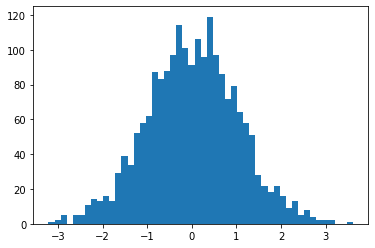

In [45]:
plt.hist(sorted_x, bins = 50)
plt.show()

cool.  I'm better convinced that this is normally random.

## 2. Operations

1. Addition
2. in-place operations
3. mathematical operations
4. matrix multiplication
    - dot product
    - matrix product
5. changing dimensions
6. element-wise operations
7. broadcasting

### 2.1 Addition

First, we define a couple tensors for our purposes.

In [48]:
x = torch.randn(2,3,1,2)

In [49]:
x

tensor([[[[ 1.1677,  0.2297]],

         [[-0.5983,  1.2568]],

         [[-1.2132,  0.0813]]],


        [[[-0.4010,  0.4659]],

         [[ 1.2019,  0.5684]],

         [[ 0.5998,  0.2074]]]])

Taking a look at this, let's break down the dimensions and count.

```
tensor([
        [    
             [   [ 1.1677,  0.2297]   ],

             [   [-0.5983,  1.2568]   ],

             [   [-1.2132,  0.0813]   ]
        ],


        [    
             [   [-0.4010,  0.4659]   ],

             [   [ 1.2019,  0.5684]   ],

             [   [ 0.5998,  0.2074]   ]
        ]
       ])
```
Spacing out to make clear how dimensions are represented in pytorch.  Note that the $3^{rd}$ dimension is not represented, since it's 1.

Now we define couple more vectors.

In [50]:
y = torch.randn(2,3,1,2)
z = torch.randn(2,3,2  )
a = torch.randn(  3,1,2)
b = torch.randn(2,3,1  )

We can use various representation to add two tensors: `+`, `torch.add(tensor)`

In [51]:
x+y

tensor([[[[ 2.0093, -1.1083]],

         [[ 0.2044,  1.8400]],

         [[-1.9570, -1.0163]]],


        [[[ 0.2404,  0.0967]],

         [[ 2.6468,  0.6410]],

         [[ 1.6830, -0.2078]]]])

In [53]:
y+x

tensor([[[[ 2.0093, -1.1083]],

         [[ 0.2044,  1.8400]],

         [[-1.9570, -1.0163]]],


        [[[ 0.2404,  0.0967]],

         [[ 2.6468,  0.6410]],

         [[ 1.6830, -0.2078]]]])

In [52]:
x.add(y)

tensor([[[[ 2.0093, -1.1083]],

         [[ 0.2044,  1.8400]],

         [[-1.9570, -1.0163]]],


        [[[ 0.2404,  0.0967]],

         [[ 2.6468,  0.6410]],

         [[ 1.6830, -0.2078]]]])

### 2.2 In-place operations

Sometimes we want to operate on a tensor and modify it.  This can be done using `_`.  To do this, we first make a copy of a tensor using `tensor.clone()` method.

In [54]:
x_copy = x.clone()

In [55]:
x_copy

tensor([[[[ 1.1677,  0.2297]],

         [[-0.5983,  1.2568]],

         [[-1.2132,  0.0813]]],


        [[[-0.4010,  0.4659]],

         [[ 1.2019,  0.5684]],

         [[ 0.5998,  0.2074]]]])

Then, we do an in-place operation to add `x_copy` and `y`

In [56]:
x_copy.add_(y)

tensor([[[[ 2.0093, -1.1083]],

         [[ 0.2044,  1.8400]],

         [[-1.9570, -1.0163]]],


        [[[ 0.2404,  0.0967]],

         [[ 2.6468,  0.6410]],

         [[ 1.6830, -0.2078]]]])

Now, we see that this tensor is modified

In [57]:
x_copy

tensor([[[[ 2.0093, -1.1083]],

         [[ 0.2044,  1.8400]],

         [[-1.9570, -1.0163]]],


        [[[ 0.2404,  0.0967]],

         [[ 2.6468,  0.6410]],

         [[ 1.6830, -0.2078]]]])

However, the original tensor is un-modified.

In [58]:
x

tensor([[[[ 1.1677,  0.2297]],

         [[-0.5983,  1.2568]],

         [[-1.2132,  0.0813]]],


        [[[-0.4010,  0.4659]],

         [[ 1.2019,  0.5684]],

         [[ 0.5998,  0.2074]]]])

Other types of in-place operations:

- `abs_()`
- `acos_()`: inverse cosine of input and then save to the variable.
- `addmm_(input-matrix, m1, m2)`: matrix multiply `m1` and `m2`, then add to `input-matrix`.

... etc.

### 3. Mathematical Operations

Some mathematical operations that might be useful:

**Element-wi** 